---
title: "Logistic regression"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

https://en.wikipedia.org/wiki/Logistic_regression

## What's the difference between linear regression and logistic regression?

Logistic regression analysis is used to examine the association of (categorical or continuous) independent variable(s) with one dichotomous dependent variable. This is in contrast to linear regression analysis in which the dependent variable is a continuous variable.

https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning

## Logistic regression in Python

https://realpython.com/logistic-regression-python/

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

## Logistic regression: simple example

Import packages

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Make up data

In [10]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [12]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

Note: we use reshape on `x` because when using the `LogisticRegression` function the x array must be two-dimensional. 

Using `reshape()` with the arguments -1, 1 gives us as many rows as needed and one column. 

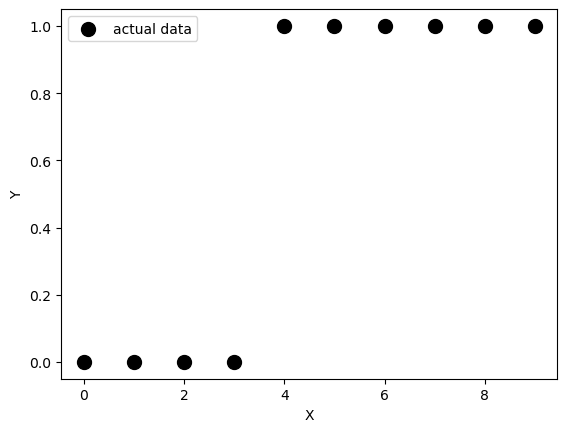

In [14]:
fig, ax = plt.subplots()
ax.scatter(x, y, 
           color='black', 
           s=100, 
           label="actual data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

Create the model


In [16]:
model = LogisticRegression(solver='liblinear')

Train the model

In [18]:
model.fit(x, y)

LogisticRegression(solver='liblinear')

Alternatively, we can create and fit the model in just one step

In [20]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

Our potential y-values... not very surprising

In [22]:
model.classes_

array([0, 1])

The model's intercept

In [24]:
model.intercept_

array([-1.04608067])

The model's coefficient

In [26]:
model.coef_

array([[0.51491375]])

Evaluate the model

In [28]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

This returns the matrix of probabilities that the predicted output is equal to zero or one.  The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict().
This function returns the predicted output values as a one-dimensional array.

In [30]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Plot the results

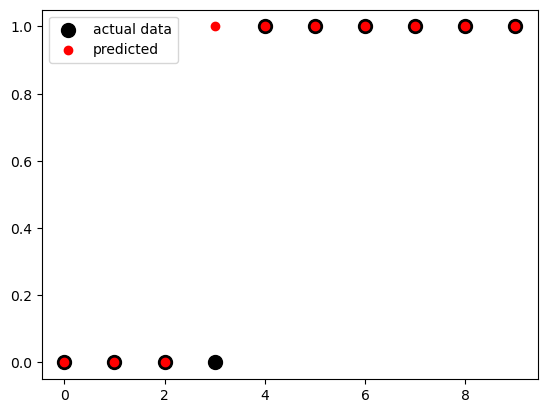

In [32]:
fig, ax = plt.subplots()
ax.scatter(x, y,
           color='black', 
           s=100, 
           label="actual data")
ax.scatter(x, model.predict(x), 
           color='red', 
           label="predicted")
ax.legend()

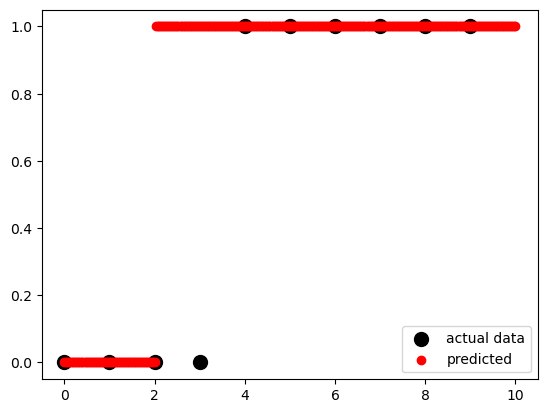

In [34]:
x_test = np.linspace(0, 10, 300).reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(x, y, 
           color='black', 
           s=100, 
           label="actual data")
ax.scatter(x_test, 
           model.predict(x_test), 
           color='red', 
           label="predicted")
ax.legend()


According to the logistic function:  
### $p=\frac{1}{1+e^{-(a+bx)}}$
* `expit()` This is a function from the SciPy library, specifically from the scipy.special module. It calculates the sigmoid function, which is defined as `1 / (1 + exp(-x))`.  
* `.ravel()` This function is called on the result of `expit()` to flatten or reshape the output as a 1-dimensional array. It converts a potentially multi-dimensional array into a contiguous flattened array.

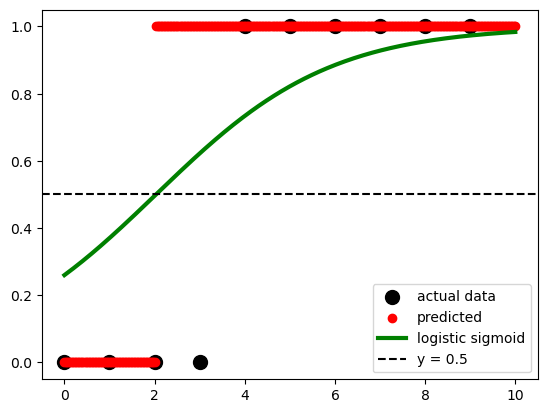

In [36]:
sigmoid = expit(x_test * model.coef_ + model.intercept_).ravel()

fig, ax = plt.subplots()
ax.scatter(x, y, 
           color='black', 
           s=100, 
           label="actual data")
ax.scatter(x_test, 
           model.predict(x_test), 
           color='red', 
           label="predicted")
ax.plot(x_test, 
        sigmoid, 
        color='green', 
        linewidth=3, 
        label='logistic sigmoid')
ax.axhline(y=0.5, 
           color='black', 
           ls='--', 
           label='y = 0.5')
ax.legend()

Get the model score

In [37]:
model.score(x, y)

0.9

Text(0.5, 1.0, 'Confusion Matrix')

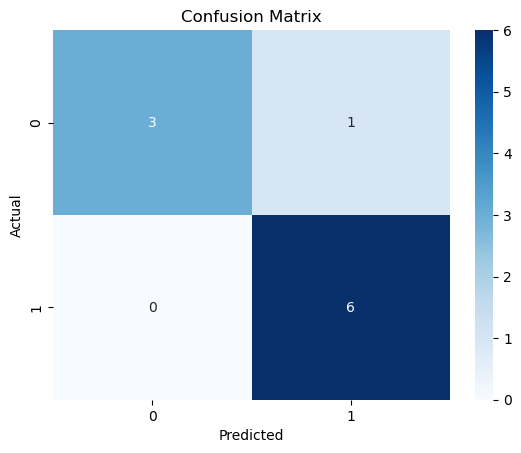

In [40]:
# get the predicted values
y_pred = model.predict(x)

# create the confusion matrix
cm = confusion_matrix(y, y_pred)

# plot the confusion matrix using fig, ax method
fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')


.score() takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

### We can also use the `StatsModels` packages, which provides some more statistical details

In [44]:
# import packages
import statsmodels.api as sm

# create data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

# create model
model = sm.Logit(y, x)

# fit model
result = model.fit()

# get results
result.params

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


array([-1.972805  ,  0.82240094])

In [46]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                  0.4263
Time:                        16:37:47   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
